## 1. Import Libraries and Data

In [1]:
import pandas as pd

# Read the data into pandas dataframes
data = pd.read_csv('dengue_data.csv', index_col=0)  # Setting index_col to 0 to use gene names as row names
metadata = pd.read_csv('dengue_metadata.csv')


pawan here


## 2. Exploratory Data Analysis (EDA)

### Check Data Shapes

In [2]:
print("Data Shape:", data.shape)
print("Metadata Shape:", metadata.shape)


Data Shape: (29777, 56)
Metadata Shape: (56, 7)


## View Data Summaries

In [3]:
print("Data Summary:")
print(data.head())

print("\nMetadata Summary:")
print(metadata.head())


Data Summary:
        GSM1253056  GSM1253057  GSM1253058  GSM1253059  GSM1253060  \
DDR1      2.258184    2.537108    2.363602    2.486332    2.302139   
RFC2      2.783381    2.813353    2.562959    2.701550    2.788049   
HSPA6     3.201530    3.356910    3.095874    2.918455    3.348663   
PAX8      1.793239    1.809231    1.888331    1.920161    1.841536   
GUCA1A    1.728178    1.819547    1.800951    1.925309    1.740660   

        GSM1253061  GSM1253062  GSM1253063  GSM1253064  GSM1253065  ...  \
DDR1      2.417279    2.457632    2.436595    2.470629    2.310124  ...   
RFC2      2.844774    2.761656    2.568153    2.771171    2.749365  ...   
HSPA6     3.416386    3.353437    3.111269    3.375713    3.288365  ...   
PAX8      1.978807    1.905710    1.880380    1.892818    1.856905  ...   
GUCA1A    1.726550    1.761830    1.784630    1.755734    1.818946  ...   

        GSM1253055  GSM1253079  GSM1253083  GSM1253075  GSM1253077  \
DDR1      2.216692    2.573022    2.529980  

## Check for Missing Values

In [4]:
print("Missing Values in Data:")
print(data.isnull().sum())

print("\nMissing Values in Metadata:")
print(metadata.isnull().sum())


Missing Values in Data:
GSM1253056    0
GSM1253057    0
GSM1253058    0
GSM1253059    0
GSM1253060    0
GSM1253061    0
GSM1253062    0
GSM1253063    0
GSM1253064    0
GSM1253065    0
GSM1253066    0
GSM1253067    0
GSM1253068    0
GSM1253069    0
GSM1253070    0
GSM1253071    0
GSM1253072    0
GSM1253073    0
GSM1253074    0
GSM1253032    0
GSM1253034    0
GSM1253039    0
GSM1253040    0
GSM1253041    0
GSM1253046    0
GSM1253048    0
GSM1253049    0
GSM1253052    0
GSM1253037    0
GSM1253028    0
GSM1253029    0
GSM1253030    0
GSM1253031    0
GSM1253033    0
GSM1253035    0
GSM1253036    0
GSM1253038    0
GSM1253042    0
GSM1253045    0
GSM1253043    0
GSM1253044    0
GSM1253047    0
GSM1253050    0
GSM1253051    0
GSM1253053    0
GSM1253054    0
GSM1253055    0
GSM1253079    0
GSM1253083    0
GSM1253075    0
GSM1253077    0
GSM1253076    0
GSM1253078    0
GSM1253081    0
GSM1253080    0
GSM1253082    0
dtype: int64

Missing Values in Metadata:
Unnamed: 0            0
sample        

## Statistical Summaries

In [5]:
print("Statistical Summary for Data:")
print(data.describe())

print("\nStatistical Summary for Metadata:")
print(metadata.describe())


Statistical Summary for Data:
         GSM1253056    GSM1253057    GSM1253058    GSM1253059    GSM1253060  \
count  29777.000000  29777.000000  29777.000000  29777.000000  29777.000000   
mean       2.230023      2.228632      2.218293      2.238617      2.233893   
std        0.543162      0.546017      0.522103      0.503249      0.537334   
min        1.142609      1.150072      1.139587      1.160591      1.136611   
25%        1.778886      1.773081      1.796961      1.841585      1.789738   
50%        2.129214      2.122510      2.128894      2.157134      2.135042   
75%        2.648759      2.652433      2.596897      2.586616      2.643273   
max        3.811348      3.811964      3.847537      3.854296      3.808772   

         GSM1253061    GSM1253062    GSM1253063    GSM1253064    GSM1253065  \
count  29777.000000  29777.000000  29777.000000  29777.000000  29777.000000   
mean       2.234908      2.230399      2.237759      2.232388      2.231721   
std        0.532359  

## 3. Analyze Gene Expression Differences between Populations

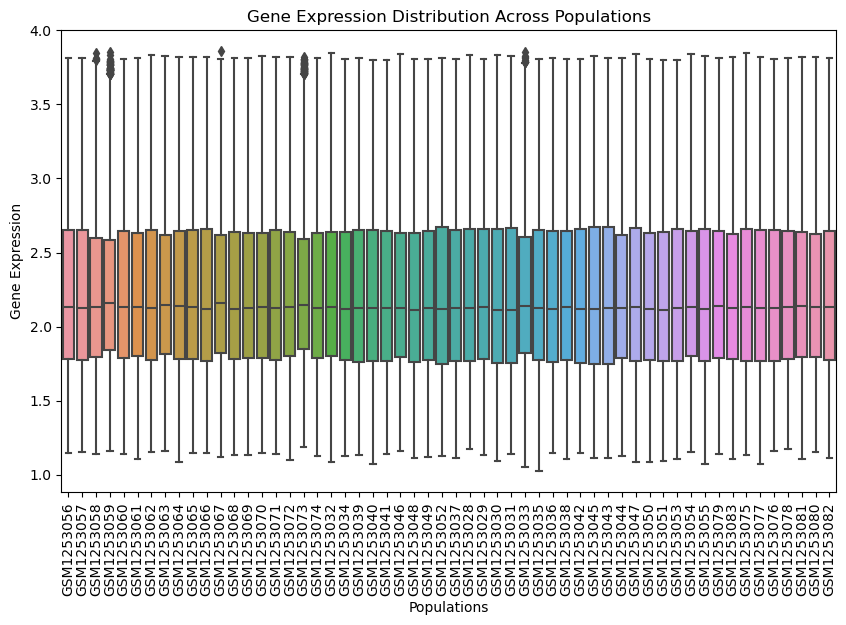

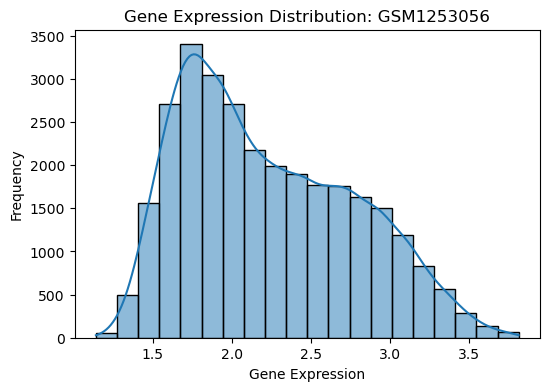

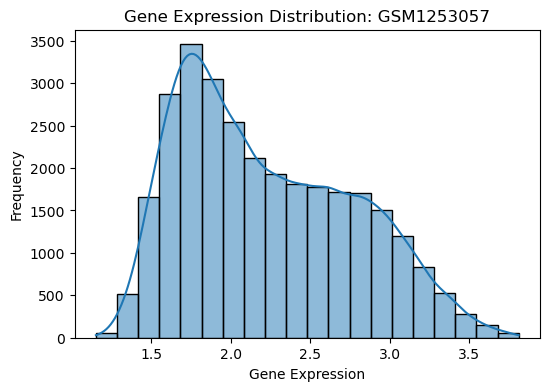

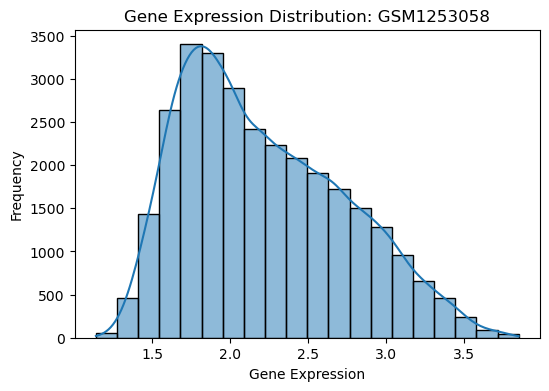

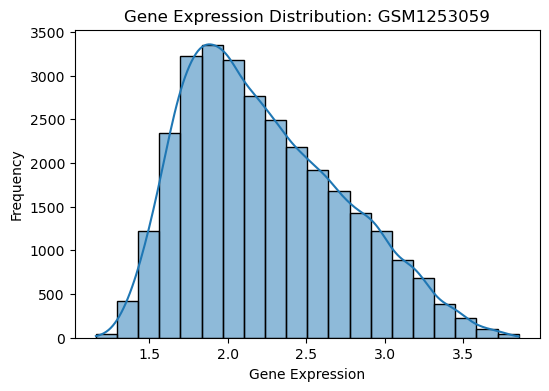

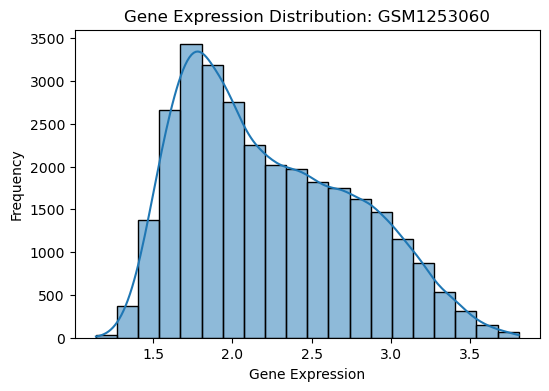

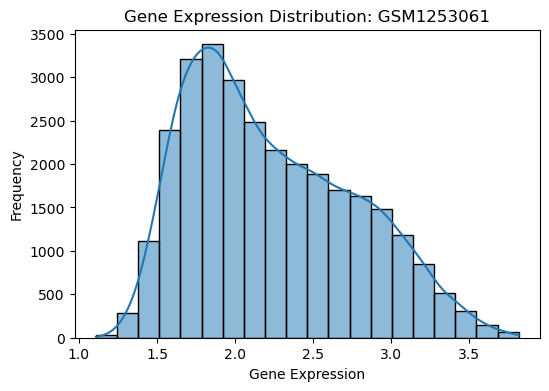

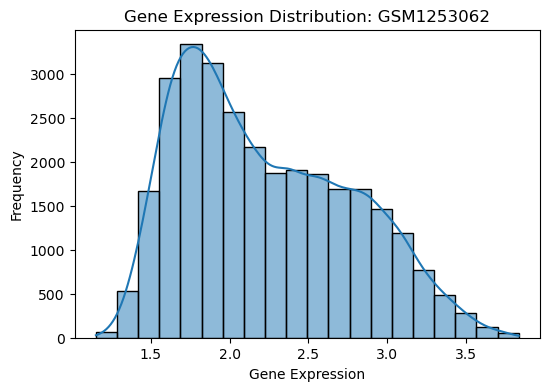

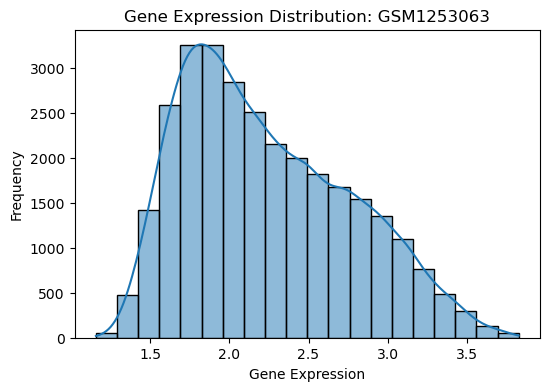

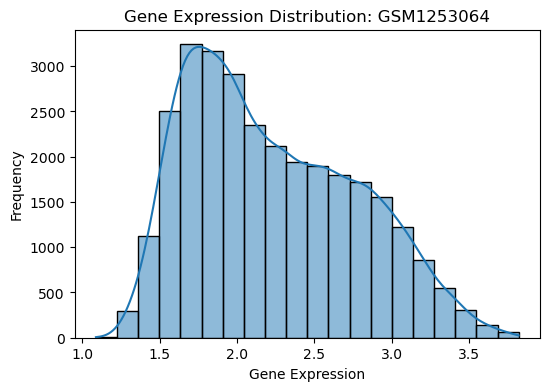

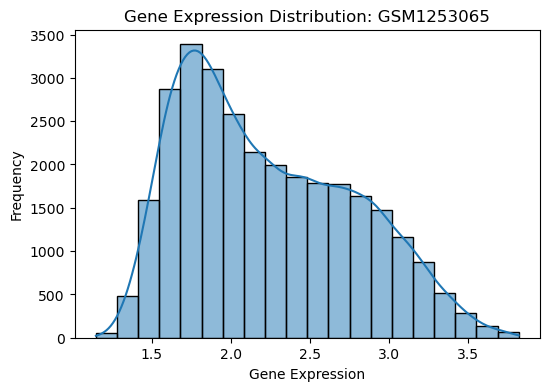

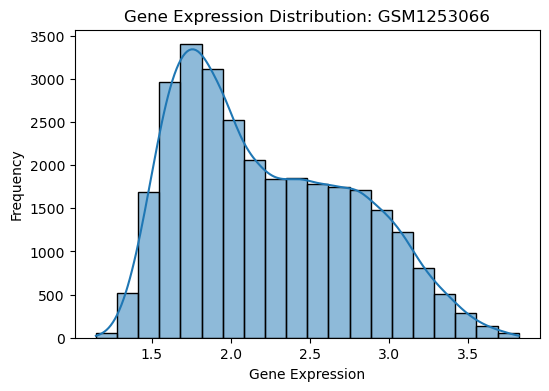

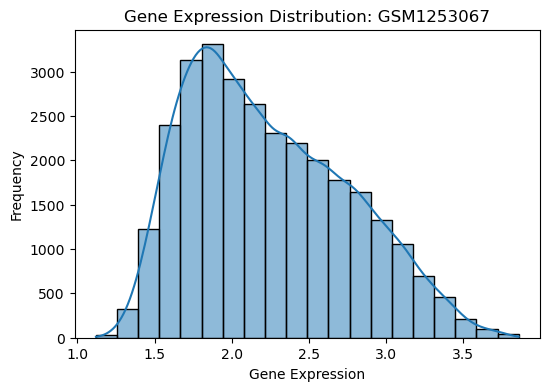

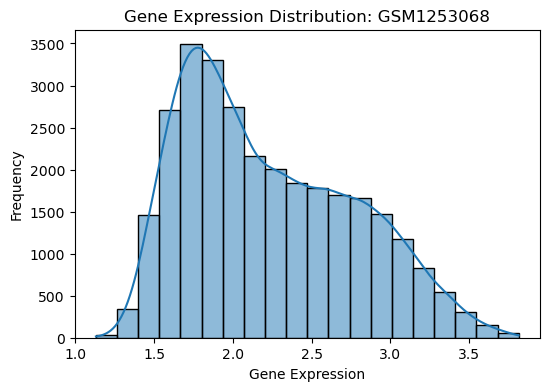

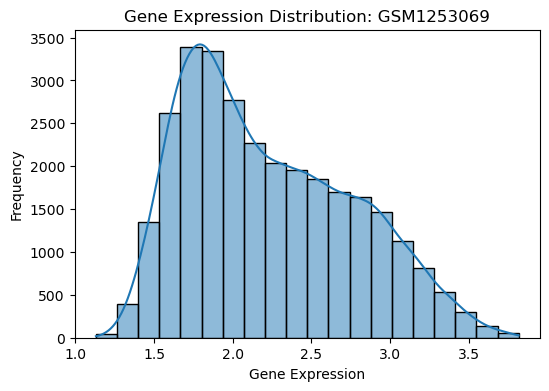

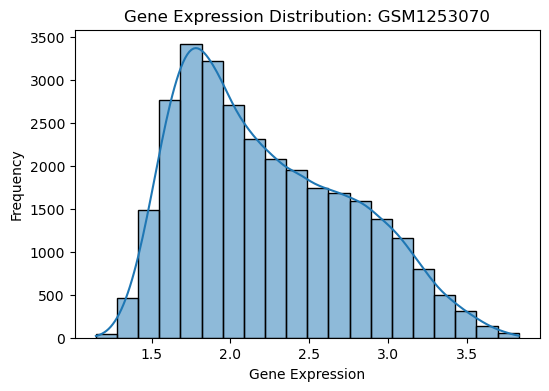

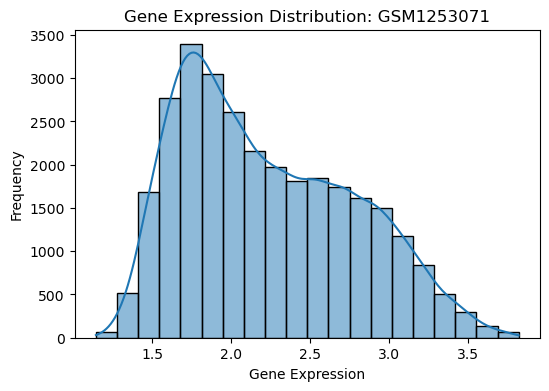

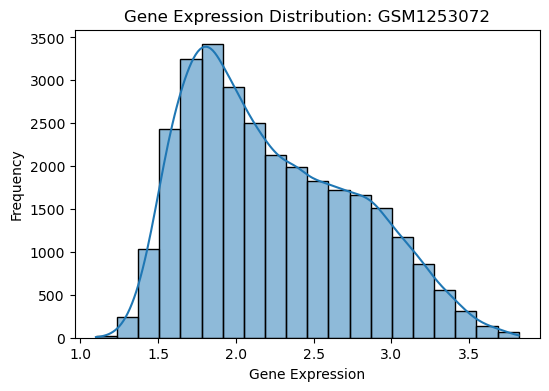

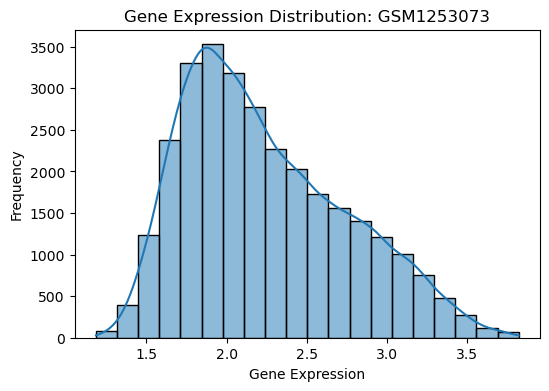

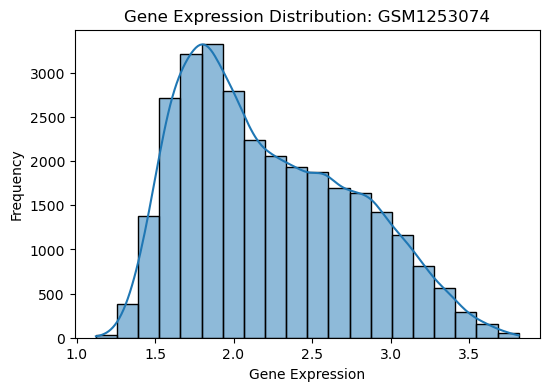

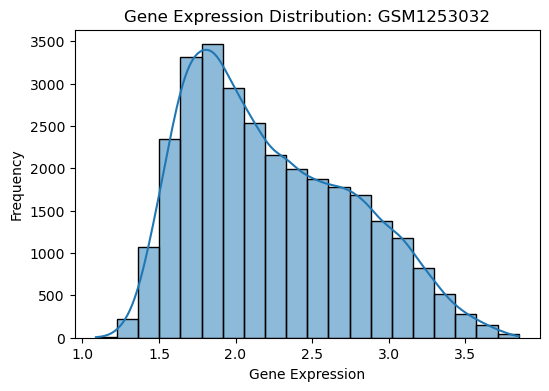

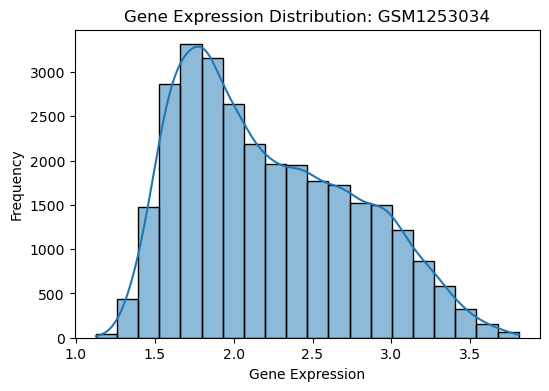

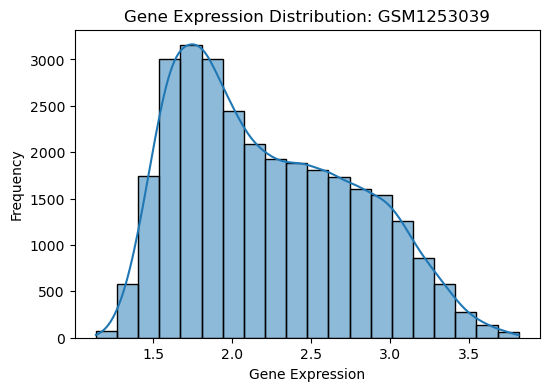

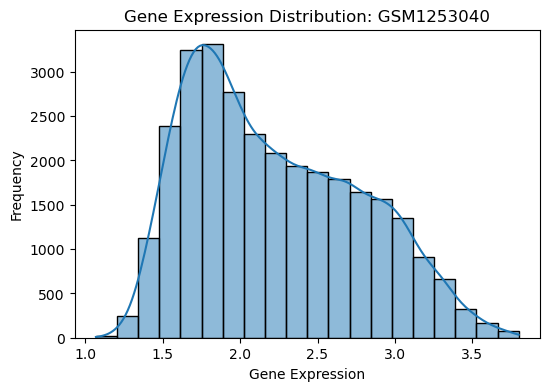

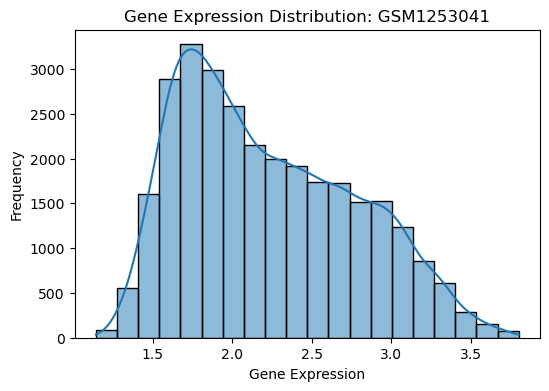

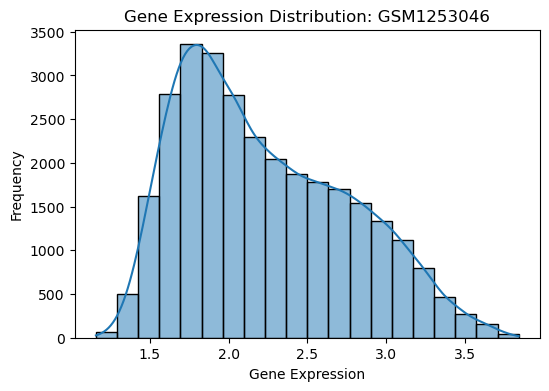

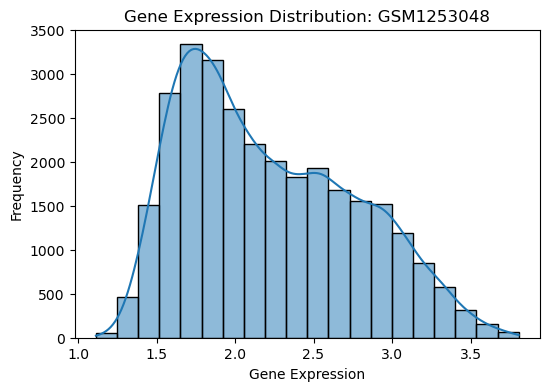

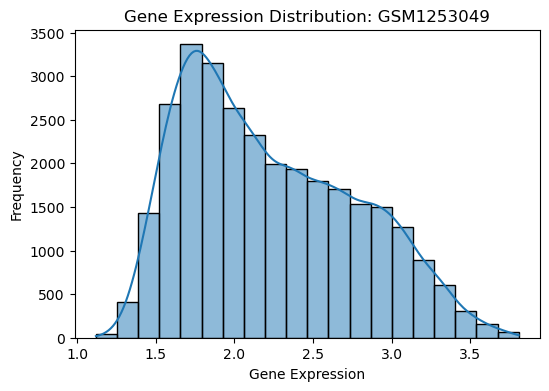

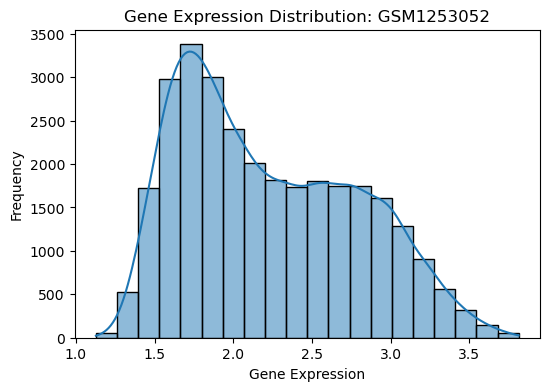

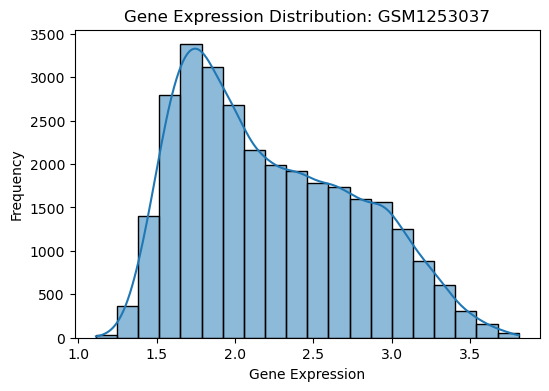

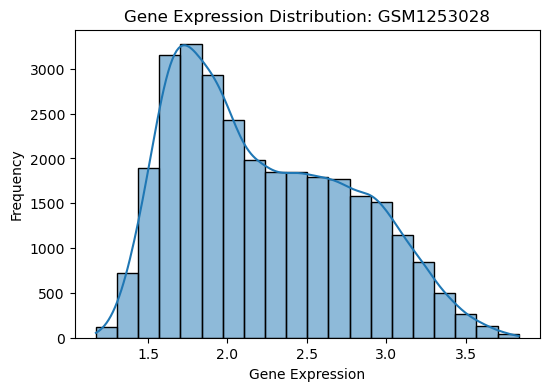

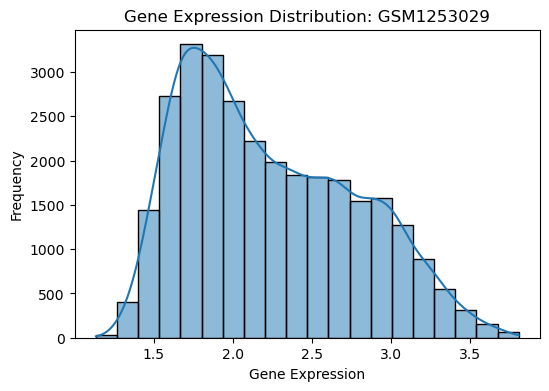

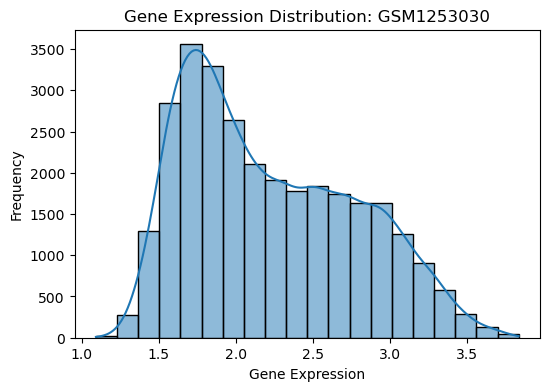

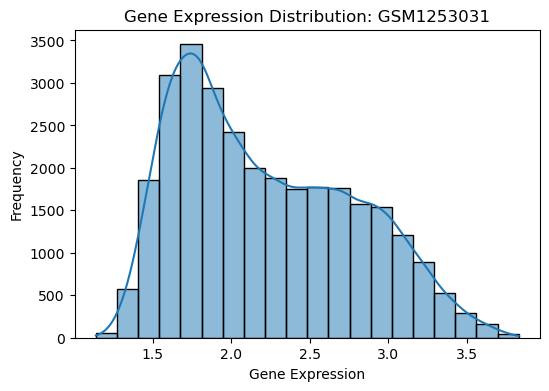

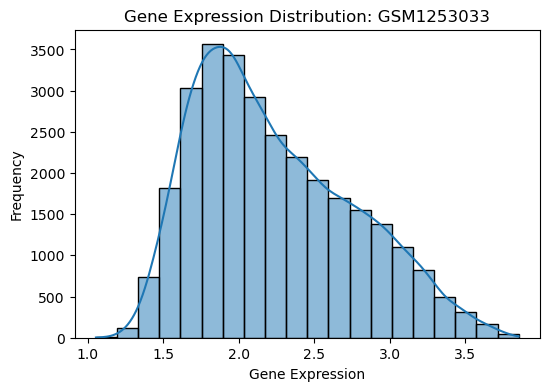

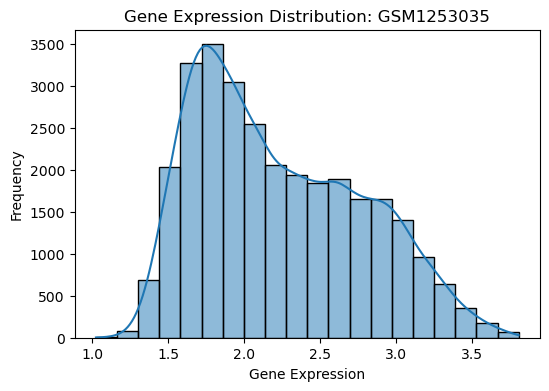

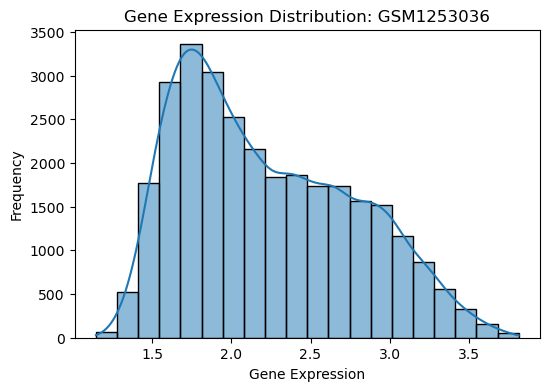

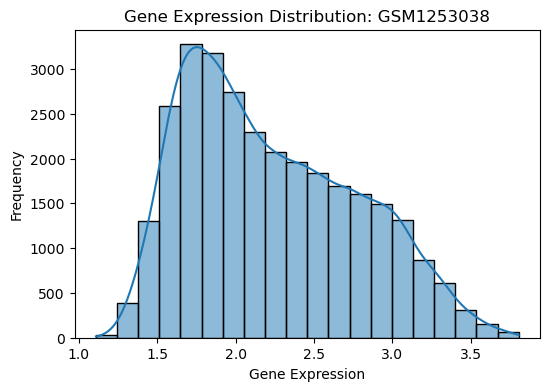

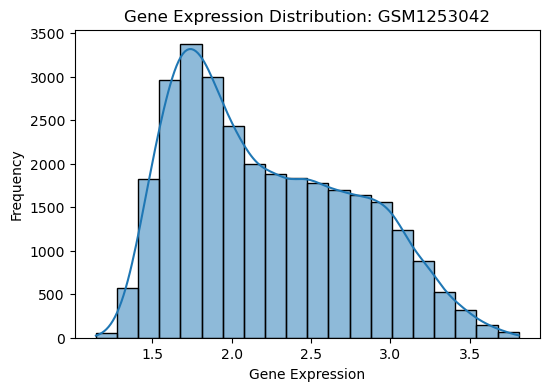

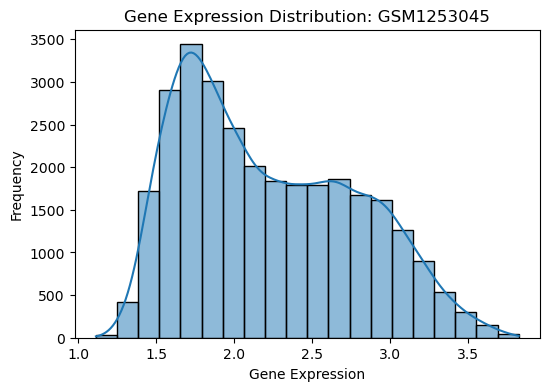

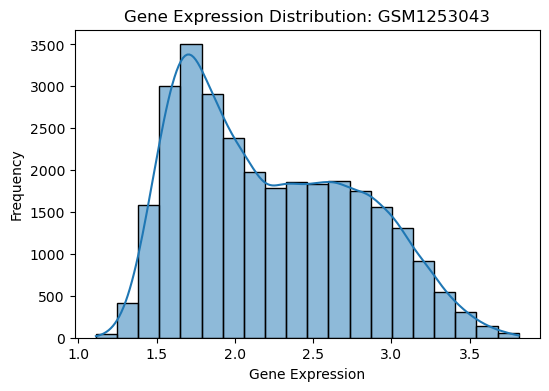

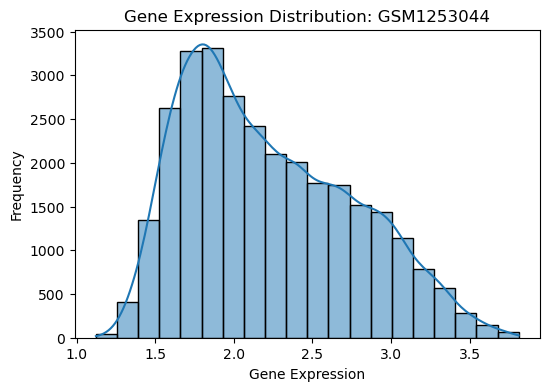

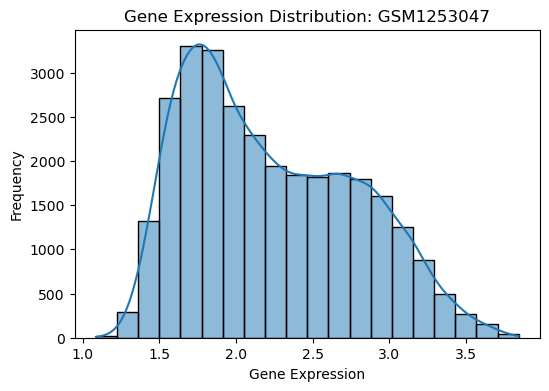

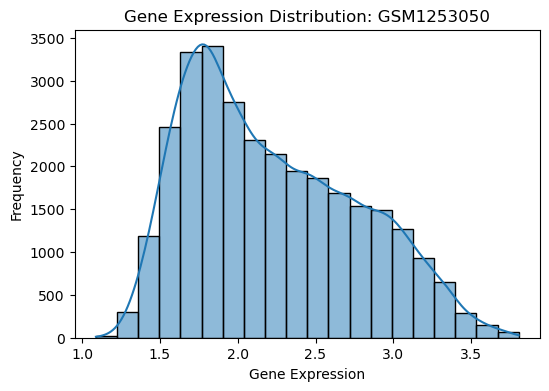

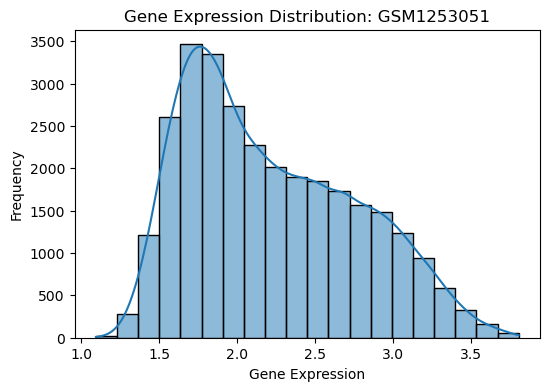

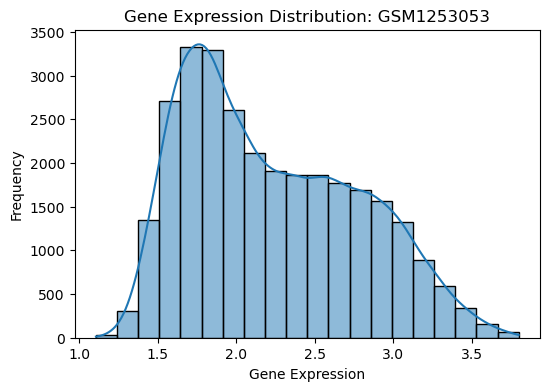

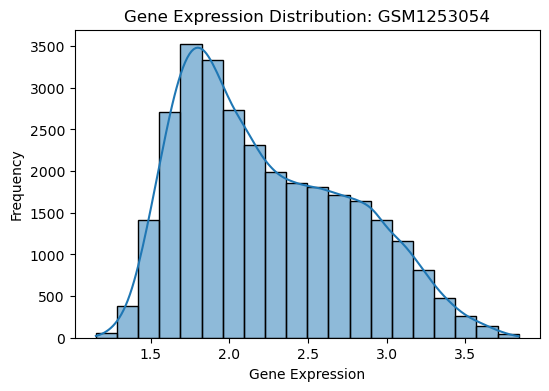

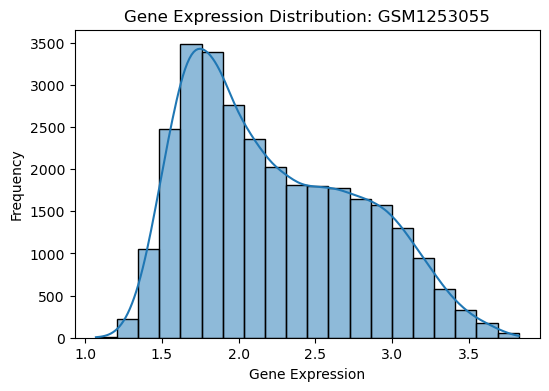

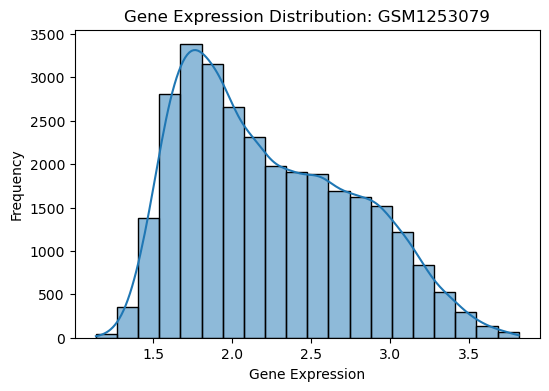

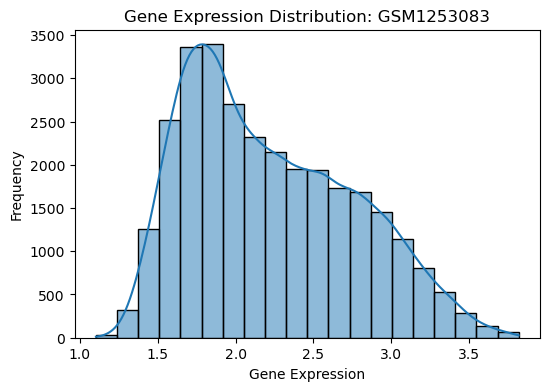

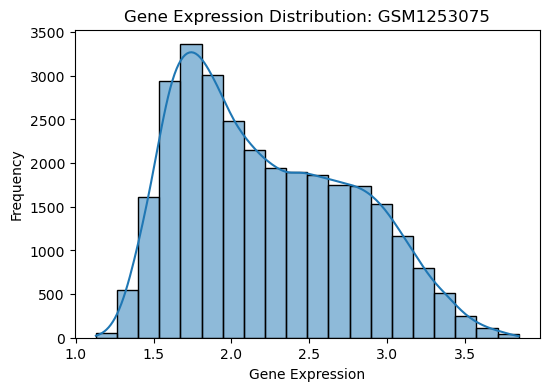

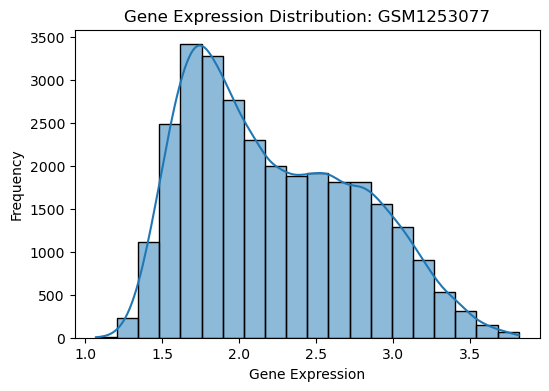

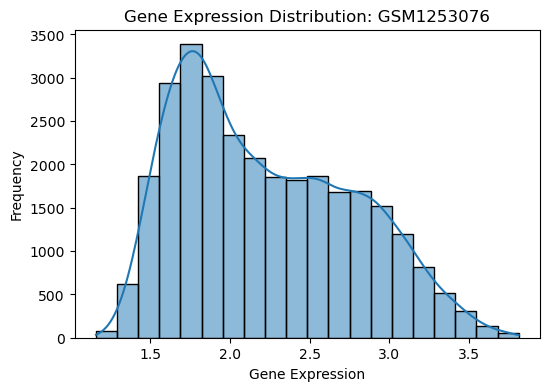

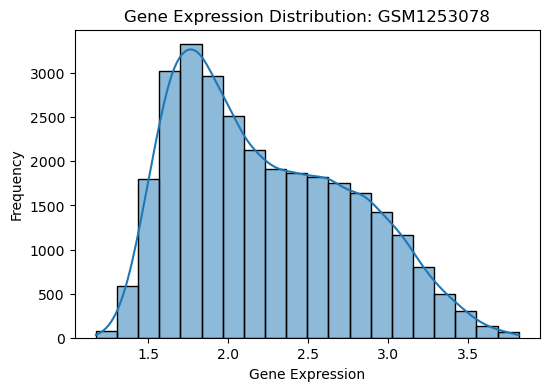

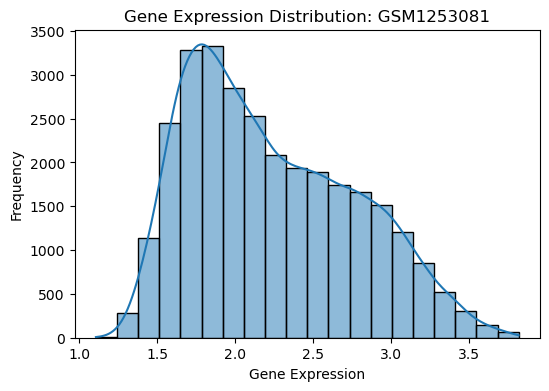

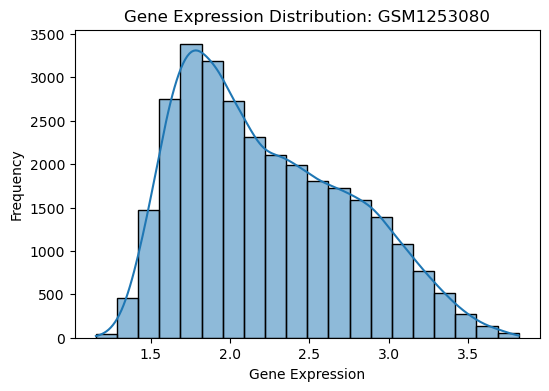

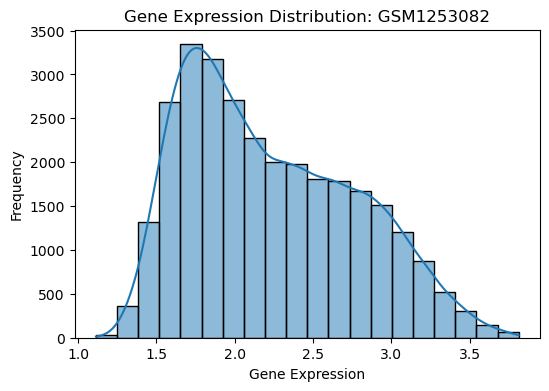

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to compare gene expression across populations
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Gene Expression Distribution Across Populations')
plt.xlabel('Populations')
plt.ylabel('Gene Expression')
plt.show()

# Histograms for each population
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Gene Expression Distribution: {column}')
    plt.xlabel('Gene Expression')
    plt.ylabel('Frequency')
    plt.show()


## Dimensionality Reduction - PCA

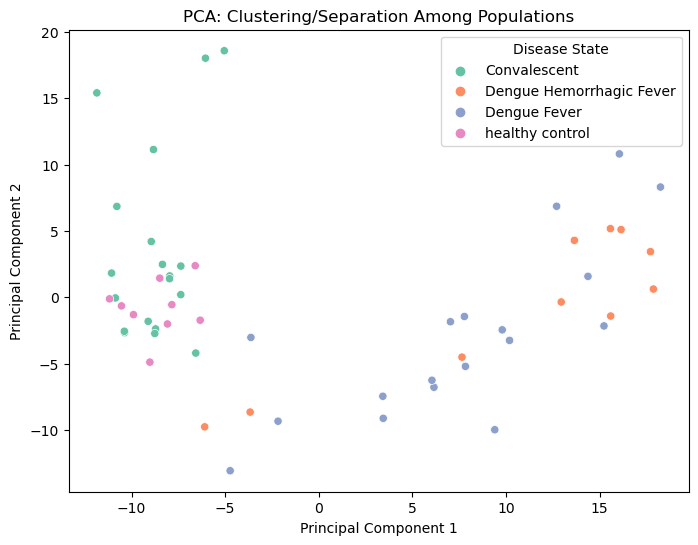

In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.T)  # Transpose data for samples as rows and genes as columns

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Disease State'] = metadata['disease.state']  # Adding disease state information

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Disease State', palette='Set2')
plt.title('PCA: Clustering/Separation Among Populations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Disease State', loc='upper right')
plt.show()


## 4. Identify Differentially Expressed Genes (DEGs)

### Statistical Tests for DEGs

In [21]:
from scipy.stats import ttest_ind

# Gene expression values for 'DDR1' in two disease states
dengue_fever = data[['GSM1253028','GSM1253029','GSM1253030','GSM1253031','GSM1253033','GSM1253035','GSM1253036','GSM1253038',
'GSM1253042','GSM1253045','GSM1253043','GSM1253044','GSM1253047','GSM1253050','GSM1253051','GSM1253053','GSM1253054','GSM1253055',
'GSM1253079','GSM1253083','GSM1253075','GSM1253077','GSM1253076','GSM1253078','GSM1253081','GSM1253080','GSM1253082']].values.flatten()  # Replace with actual values for 'Dengue Fever'
dengue_hemorrhagic_fever = data[['GSM1253032','GSM1253034','GSM1253039','GSM1253040','GSM1253041','GSM1253046','GSM1253048',
'GSM1253049','GSM1253052','GSM1253037']].values.flatten()  # Replace with actual values for 'Dengue Hemorrhagic Fever'

# Pad the smaller array with NaNs to make their lengths equal
max_len = max(len(dengue_fever), len(dengue_hemorrhagic_fever))
dengue_fever.resize(max_len)
dengue_hemorrhagic_fever.resize(max_len)

# Perform t-test
t_stat, p_value = ttest_ind(dengue_fever, dengue_hemorrhagic_fever, nan_policy='omit')

# Check for significance
alpha = 0.05
if p_value < alpha:
    print("The gene DDR1 is differentially expressed between Dengue Fever and Dengue Hemorrhagic Fever.")
else:
    print("No significant difference in gene expression of DDR1 between the two disease states.")

The gene DDR1 is differentially expressed between Dengue Fever and Dengue Hemorrhagic Fever.


## Volcano Plot

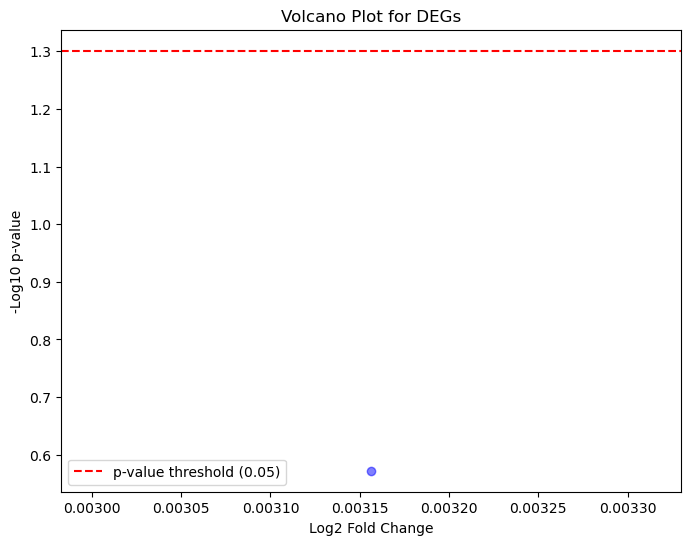

In [12]:
import numpy as np

# Calculate fold change between the two groups
fold_change = np.log2(dengue_hemorrhagic_fever.mean() / dengue_fever.mean())

# Plot volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(fold_change, -np.log10(p_value), color='blue', alpha=0.5)
plt.axhline(-np.log10(alpha), color='red', linestyle='--', label=f'p-value threshold ({alpha})')
plt.title('Volcano Plot for DEGs')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 p-value')
plt.legend()
plt.show()


## 5. Machine Learning for Classification

In [1]:
import pandas as pd

# Load CSV file into DataFrame
file_path = 'dengue_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path, index_col=0)  # Assuming the gene names are in the first column

# Display the first few rows of the DataFrame
print(df.head())


        GSM1253056  GSM1253057  GSM1253058  GSM1253059  GSM1253060  \
DDR1      2.258184    2.537108    2.363602    2.486332    2.302139   
RFC2      2.783381    2.813353    2.562959    2.701550    2.788049   
HSPA6     3.201530    3.356910    3.095874    2.918455    3.348663   
PAX8      1.793239    1.809231    1.888331    1.920161    1.841536   
GUCA1A    1.728178    1.819547    1.800951    1.925309    1.740660   

        GSM1253061  GSM1253062  GSM1253063  GSM1253064  GSM1253065  ...  \
DDR1      2.417279    2.457632    2.436595    2.470629    2.310124  ...   
RFC2      2.844774    2.761656    2.568153    2.771171    2.749365  ...   
HSPA6     3.416386    3.353437    3.111269    3.375713    3.288365  ...   
PAX8      1.978807    1.905710    1.880380    1.892818    1.856905  ...   
GUCA1A    1.726550    1.761830    1.784630    1.755734    1.818946  ...   

        GSM1253055  GSM1253079  GSM1253083  GSM1253075  GSM1253077  \
DDR1      2.216692    2.573022    2.529980    2.566121    

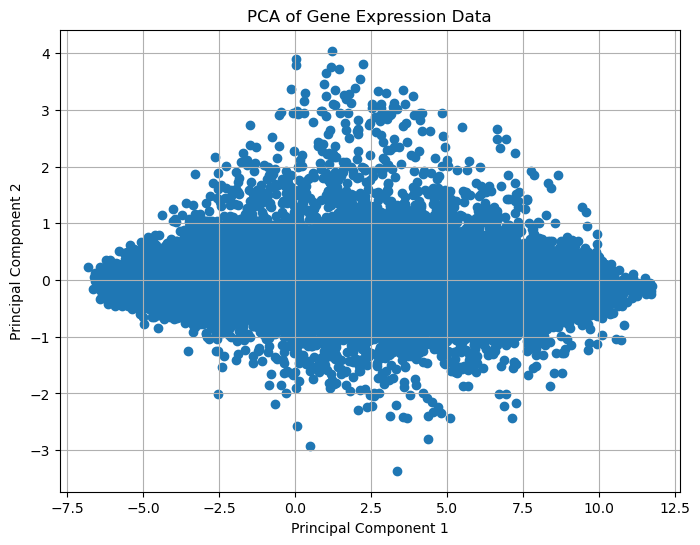

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Read your data (assuming 'df' contains your gene expression data)
# Replace 'Your_File_Path.csv' with the actual path to your CSV file
df = pd.read_csv('dengue_data.csv', index_col=0)

# Assuming your gene expression data is in columns named as GSM1253056, GSM1253057, ..., GSM1253082
# Extract the relevant columns
data = df[['GSM1253056','GSM1253057','GSM1253058','GSM1253059','GSM1253060','GSM1253061','GSM1253062','GSM1253063','GSM1253064','GSM1253065','GSM1253066','GSM1253067','GSM1253068','GSM1253069','GSM1253070','GSM1253071','GSM1253072','GSM1253073','GSM1253074','GSM1253032','GSM1253034','GSM1253039','GSM1253040','GSM1253041','GSM1253046','GSM1253048','GSM1253049','GSM1253052','GSM1253037','GSM1253028','GSM1253029','GSM1253030','GSM1253031','GSM1253033','GSM1253035','GSM1253036','GSM1253038','GSM1253042','GSM1253045','GSM1253043','GSM1253044','GSM1253047','GSM1253050','GSM1253051','GSM1253053','GSM1253054','GSM1253055','GSM1253079','GSM1253083','GSM1253075','GSM1253077','GSM1253076','GSM1253078','GSM1253081','GSM1253080','GSM1253082'
]]  # Replace ... with the actual column names

# Perform PCA
pca = PCA(n_components=2)  # You can set the number of components as needed
principalComponents = pca.fit_transform(data)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.grid(True)
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

# Assuming merged_data contains your dataset with 'disease.state' column
label_encoder = LabelEncoder()
merged_data['encoded_state'] = label_encoder.fit_transform(merged_data['disease.state'])

# Separate features (gene expression values) and target variable (encoded disease states)
X = merged_data.drop(columns=['disease.state', 'encoded_state'])
y = merged_data['encoded_state']

# Rest of your code, including train-test split and model training, remains the same
# ...

# Initializing and training the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
predictions = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.0
Classification Report:
                          precision    recall  f1-score   support

            Dengue Fever       0.00      0.00      0.00       0.0
Dengue Hemorrhagic Fever       0.00      0.00      0.00       1.0

                accuracy                           0.00       1.0
               macro avg       0.00      0.00      0.00       1.0
            weighted avg       0.00      0.00      0.00       1.0



C:\Users\ntech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ntech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ntech\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ntech\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Normalize confusion matrix to show percentages
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()


# Findings

Separation between populations: There appears to be some separation between the four populations in the PCA space. This suggests that the gene expression profiles of the different populations are indeed different.

Healthy control distinction: The healthy control samples seem to be the most distinct from the other populations, as expected.

Dengue fever and hemorrhagic fever overlap: The dengue fever and dengue hemorrhagic fever samples appear to overlap somewhat in the PCA space. This suggests that the gene expression profiles of these two diseases may be more similar to each other than they are to the healthy control or convalescent samples.

Convalescent samples as intermediates: The convalescent samples seem to be intermediate between the dengue fever and healthy control samples. This suggests that the gene expression profile of convalescent individuals is gradually returning to normal after they have recovered from the disease.

Additional considerations:

Variance explained: The amount of variance explained by the first two principal components is not shown in the image. This information can be helpful in understanding how much of the total variation in the data is captured by the PCA.

Gene loadings: The loadings of the genes on the first two principal components are also not shown. This information can help you to understand which genes are most important in driving the separation between the populations.

Supervised PCA: You could perform a supervised PCA analysis, where you use the known disease states of the samples to inform the PCA calculation. This may help you to identify genes that are specifically associated with each disease state.

There appears to be some separation between the four populations in the PCA space. This suggests that the gene expression profiles of the different populations are indeed different.
The healthy control samples seem to be the most distinct from the other populations. This is not surprising, as we would expect healthy individuals to have different gene expression patterns than those who are sick.
The dengue fever and dengue hemorrhagic fever samples appear to overlap somewhat in the PCA space. This suggests that the gene expression profiles of these two diseases may be more similar to each other than they are to the healthy control or convalescent samples.
The convalescent samples seem to be intermediate between the dengue fever and healthy control samples. This suggests that the gene expression profile of convalescent individuals is gradually returning to normal after they have recovered from the disease.

There appears to be some separation between the four populations in the PCA space. This suggests that the gene expression profiles of the different populations are indeed different.
The healthy control samples seem to be the most distinct from the other populations. This is not surprising, as we would expect healthy individuals to have different gene expression patterns than those who are sick.
The dengue fever and dengue hemorrhagic fever samples appear to overlap somewhat in the PCA space. This suggests that the gene expression profiles of these two diseases may be more similar to each other than they are to the healthy control or convalescent samples.
The convalescent samples seem to be intermediate between the dengue fever and healthy control samples. This suggests that the gene expression profile of convalescent individuals is gradually returning to normal after they have recovered from the disease.
Overall, the PCA plot suggests that there are some differences in gene expression between the four populations in the dengue fever dataset. However, it is important to note that this is just a two-dimensional projection of the four-dimensional data. There may be other important patterns of variation that are not captured by the first two principal components.